C:\Users\da070\AppData\Local\Temp/ipykernel_19192/4186561462.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True,ls= ':')


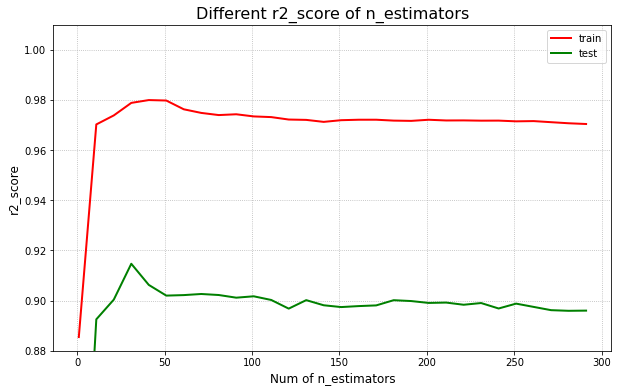

Feature: 0, Score: 0.16805
Feature: 1, Score: 0.60973
Feature: 2, Score: 0.10576
Feature: 3, Score: 0.05641
Feature: 4, Score: 0.06005


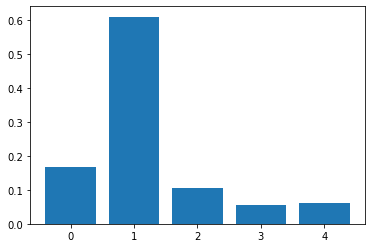

0.90017740434564


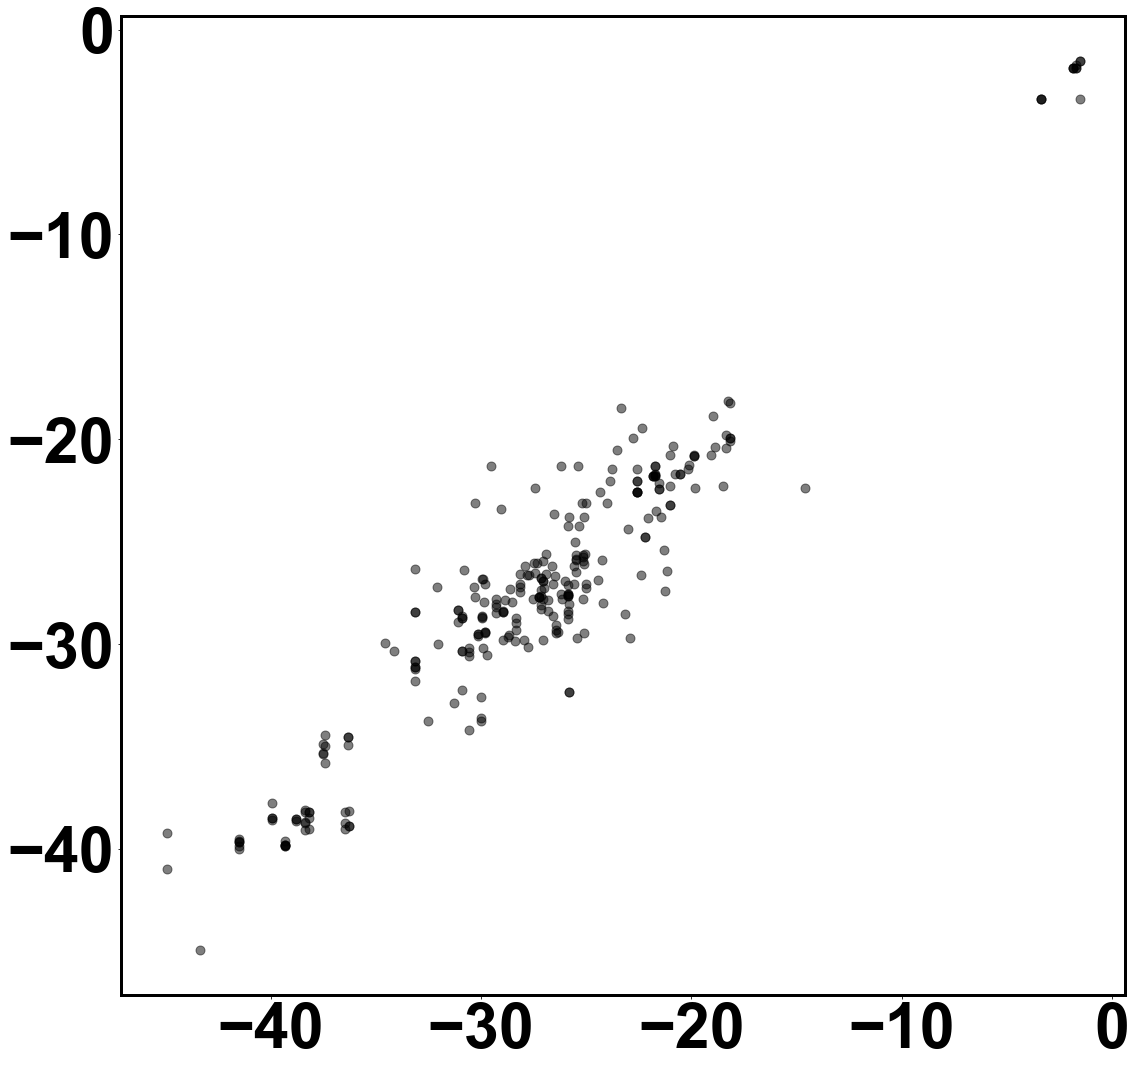

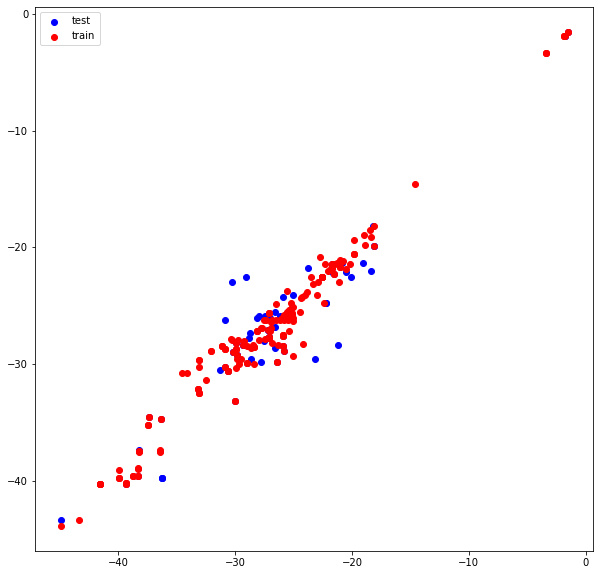

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.preprocessing import StandardScaler  # 标准化工具
import numpy as np
from sklearn.model_selection import cross_val_score , KFold , cross_val_predict
from sklearn.model_selection import train_test_split
import sklearn.tree as st
import sklearn.metrics as sm
import sklearn.tree as tree
import sklearn.ensemble as se
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
import sklearn.metrics as metrics
data = pd.read_csv("C:/Users/da070/Desktop/329/frist1.csv")
x = data.drop('out',axis=1)
y = data['out']
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x) 
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=42)
base_estimator = DecisionTreeRegressor(max_depth=6,random_state=42)
n_estimators = np.arange(1,301,10)
learning_rate = 0.05
accs_train = []
accs_test = []
for n_estimator in n_estimators:
    adaB = AdaBoostRegressor(base_estimator= base_estimator,n_estimators=n_estimator,random_state=42)
    adaB.fit(x_train, y_train)

    y_train_pred = adaB.predict(x_train)
    acc_train = metrics.r2_score(y_train, y_train_pred)
    accs_train.append(acc_train)
    
    y_test_pred = adaB.predict(x_test)
    acc_test = metrics.r2_score(y_test, y_test_pred) 
    accs_test.append(acc_test)
plt.figure(figsize=(10,6))
plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train') 
plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
#plt.savefig('F:/fig/xifu.tif')
plt.ylim(0.88,1.01)
plt.xlabel('Num of n_estimators',fontsize = 12)
plt.ylabel('r2_score',fontsize =12) 
plt.grid(b = True,ls= ':')
plt.title('Different r2_score of n_estimators',fontsize = 16)
plt.legend(loc = 'best')
plt.show() 
tree = DecisionTreeRegressor(max_depth=6,random_state=42)
tree = tree.fit(x_train,y_train)
model = AdaBoostRegressor(base_estimator=tree,n_estimators=120,learning_rate=0.08,random_state=21)
model.fit(x_train,y_train)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) 
plt.bar([x for x in range(len(importance))], importance) 
#plt.savefig('F:/fig/importance6.tif',dpi=300)
plt.show()
pre_test = model.predict(x_test) 
pre_train = model.predict(x_train)
crossvalidation = KFold(n_splits=5,shuffle=True)
plt.figure(figsize=(18,18))
plt.scatter(y,cross_val_predict(model,x_scaler,y,cv=crossvalidation),s=80,edgecolors='k',alpha=0.5,color = 'k')
plt.yticks(fontproperties='Arial', size=63,weight='bold')
plt.xticks(fontproperties='Arial', size=63,weight='bold')
#plt.tick_params(direction="out")
#plt.xlabel("Predict", fontsize=44,fontproperties='Arial',fontweight='bold')
#plt.ylabel("Test", fontsize=44,fontproperties='Arial',fontweight='bold')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.savefig('F:/fig/crossvalition_first1.tif',dpi=300) 
result = model.score(x_test,y_test)
print(result)
rmse_tr_lr=mean_squared_error(y_test,pre_test,squared=False)
rmse_te_lr=mean_squared_error(y_train,pre_train,squared=False) 
plt.figure(figsize=(10,10))
plt.scatter(y_test,pre_test,color='blue',label='test') 
plt.scatter(y_train,pre_train,color='red',label='train')
plt.legend()  
y_test=pd.DataFrame(data=y_test)
pre_test=pd.DataFrame(data=pre_test)
y_test.to_csv('F:/data/first1_test.csv') 
pre_test.to_csv('F:/data/first1_pred.csv')   
 
    
 